In [1]:
# ! pip install -e ../../savo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy as copy
from scipy import optimize
import torch

import sys
sys.path.append('../')  #for savo import
sys.path.append('../../machineIO/')  #for machineIO import
from savo.model import GaussianProcess as GP
from machineIO.util import plot_2D_projection

Failed to import 'epics'
Failed to import 'phantasy'


In [3]:
def quadratic(x, noise=0.0):
    x = torch.as_tensor(x)
    d = x.shape[-1]
    y = torch.sum(x**2, dim=-1) / d
    return 1 - y + torch.randn_like(y) * noise

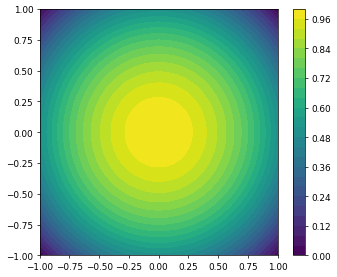

In [19]:
def plot_contour(figsize=(6,5),dpi=128):
    grid = np.linspace(-1,1,128)
    x1,x2 = np.meshgrid(grid,grid)
    xgrid = np.vstack((x1.flatten(), x2.flatten())).T
    ygrid = quadratic(xgrid,noise=0)
    fig,ax = plt.subplots(figsize=figsize,dpi=dpi)
    cs = ax.tricontourf(xgrid[:,0],xgrid[:,1],ygrid,levels=32)
    fig.colorbar(cs,ax=ax)
    return fig,ax
fig,ax = plot_contour(dpi=64)

# sample averaged gradient vs graident of mean

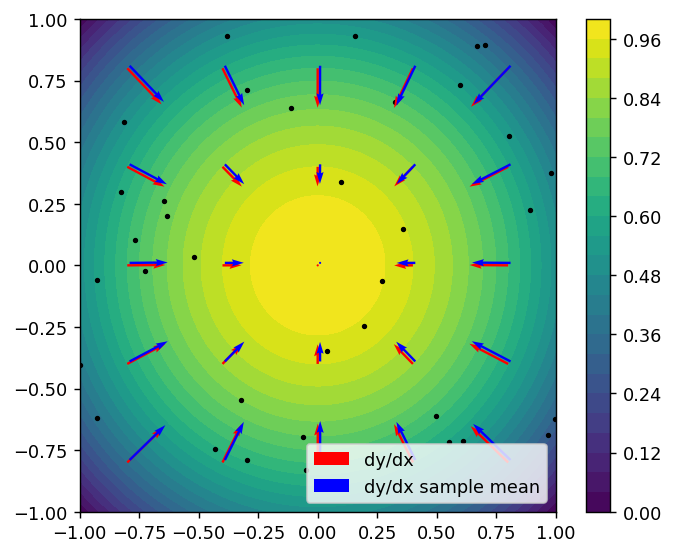

In [24]:
n_train = 36
train_x = torch.rand(n_train,2,dtype=torch.double)*2-1
train_y = quadratic(train_x).view(-1,1)
gp = GP(train_x, train_y)

grid = np.linspace(-0.8,0.8,5)
x1,x2 = np.meshgrid(grid,grid)
xgrid = torch.tensor(np.vstack((x1.flatten(), x2.flatten())).T,dtype=torch.double)
mean_ygrad = gp.get_grad(xgrid,n_samples=1)
sample_ygrad = gp.get_grad(xgrid,n_samples=1024)

X = xgrid[:, 0].numpy()
Y = xgrid[:, 1].numpy()
U1 = mean_ygrad[:, 0].numpy()
V1 = mean_ygrad[:, 1].numpy()
U2 = sample_ygrad[:, 0].numpy()
V2 = sample_ygrad[:, 1].numpy()

fig,ax = plot_contour(dpi=128)
ax.scatter(train_x[:,0],train_x[:,1],c='k',s=4)
ax.quiver(X, Y, U1, V1, color='red', angles='xy', scale_units='xy', scale=5, width=0.005, label='dy/dx')
# Plot sample-based gradient (e.g., in blue, slightly offset for visibility)
ax.quiver(X + 0.01, Y + 0.01, U2, V2, color='blue', angles='xy', scale_units='xy', scale=5, width=0.005, label='dy/dx sample mean')
ax.legend()